# Chest X-Ray Pneumonia Binary Classification

Source: `paultimothymooney/chest-xray-pneumonia` on Kaggle.com

Derived from binary image classification example [here](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%202%20-%20Lesson%202%20-%20Notebook.ipynb#scrollTo=0oj0gTIy4k60).

In [1]:
%load_ext lab_black

In [2]:
import os
import random
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

tf.random.set_seed(1)

In [3]:
print(len(os.listdir("data-vol-1/chest_xray/chest_xray/train/NORMAL")))
print(len(os.listdir("data-vol-1/chest_xray/chest_xray/train/PNEUMONIA")))

1342
3876


In [4]:
base_dir = "data-vol-1/chest_xray/chest_xray/"

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

train_normal_dir = os.path.join(train_dir, "NORMAL")
train_pneumonia_dir = os.path.join(train_dir, "PNEUMONIA")

test_normal_dir = os.path.join(test_dir, "NORMAL")
test_pneumonia_dir = os.path.join(test_dir, "PNEUMONIA")

train_normal_fnames = os.listdir(train_normal_dir)
train_pneumonia_fnames = os.listdir(train_pneumonia_dir)

print(len(os.listdir(train_normal_dir)) + len(os.listdir(train_pneumonia_dir)))
print(len(os.listdir(test_normal_dir)) + len(os.listdir(test_pneumonia_dir)))

5218
624


In [5]:
pic_index = 0

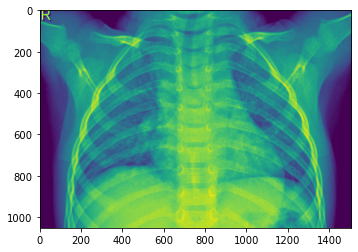

In [6]:
# NORMAL X-Ray Example

img_path = os.path.join(train_normal_dir, train_normal_fnames[pic_index])

img = mpimg.imread(img_path)
plt.imshow(img)

plt.show()

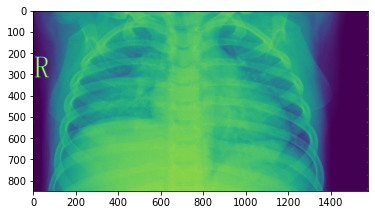

In [7]:
# PNEUMONIA X-Ray Example

img_path = os.path.join(train_pneumonia_dir, train_pneumonia_fnames[pic_index])

img = mpimg.imread(img_path)
plt.imshow(img)

plt.show()

In [8]:
train_datagen = ImageDataGenerator(rescale=1 / 255.0)
test_datagen = ImageDataGenerator(rescale=1 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=20, class_mode="binary", target_size=(150, 150)
)

test_generator = test_datagen.flow_from_directory(
    test_dir, batch_size=20, class_mode="binary", target_size=(150, 150)
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
model = keras.models.Sequential(
    [
        keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(150, 150, 3)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(32, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(32, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [10]:
model.compile(
    optimizer=RMSprop(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"]
)

In [11]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=6,
    verbose=2,
)

Epoch 1/6
261/261 - 60s - loss: 0.2806 - accuracy: 0.9062 - val_loss: 1.0019 - val_accuracy: 0.7500
Epoch 2/6
261/261 - 59s - loss: 0.1283 - accuracy: 0.9584 - val_loss: 0.9705 - val_accuracy: 0.7628
Epoch 3/6
261/261 - 58s - loss: 0.0870 - accuracy: 0.9699 - val_loss: 0.7476 - val_accuracy: 0.8285
Epoch 4/6
261/261 - 58s - loss: 0.0715 - accuracy: 0.9760 - val_loss: 1.3637 - val_accuracy: 0.7596
Epoch 5/6
261/261 - 58s - loss: 0.0602 - accuracy: 0.9803 - val_loss: 1.0210 - val_accuracy: 0.7997
Epoch 6/6
261/261 - 58s - loss: 0.0488 - accuracy: 0.9827 - val_loss: 2.3128 - val_accuracy: 0.7163


Text(0.5, 1.0, 'Training and validation loss')

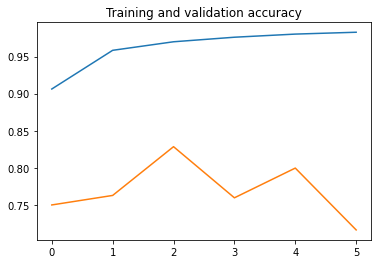

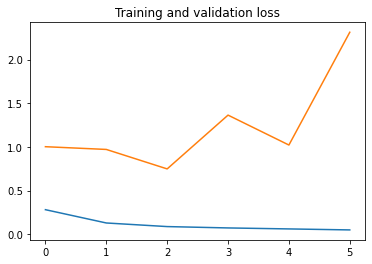

In [12]:
# -----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
# -----------------------------------------------------------
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))  # Get number of epochs

# ------------------------------------------------
# Plot training and validation accuracy per epoch
# ------------------------------------------------
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Training and validation accuracy")
plt.figure()

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Training and validation loss")

Viewing image data-vol-1/chest_xray/chest_xray/train/PNEUMONIA/person56_bacteria_269.jpeg


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide


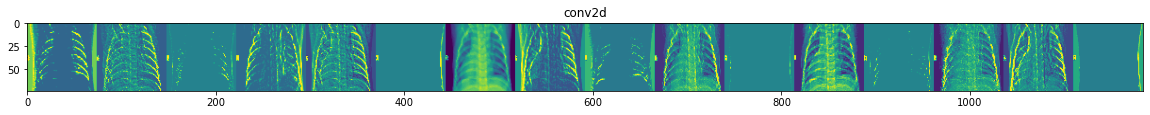

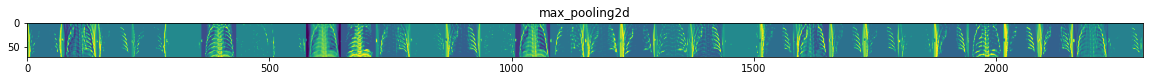

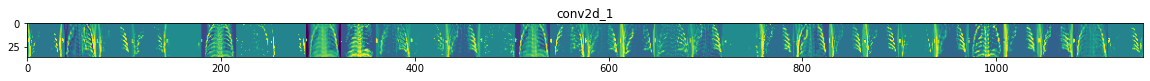

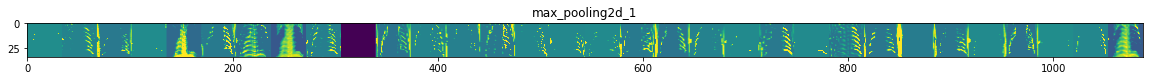

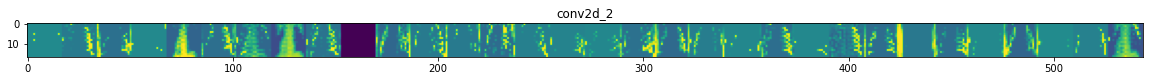

In [13]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

# visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(
    inputs=model.input, outputs=successive_outputs
)

# Let's prepare a random input image of a cat or dog from the training set.
train_normal_files = [os.path.join(train_normal_dir, f) for f in train_normal_fnames]
train_pneumonia_files = [
    os.path.join(train_pneumonia_dir, f) for f in train_pneumonia_fnames
]

img_path = random.choice(train_normal_files + train_pneumonia_files)
print(f"Viewing image {img_path}")
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    if len(feature_map.shape) == 4:

        # -------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        # -------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)

        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))

        # -------------------------------------------------
        # Postprocess the feature to be visually palatable
        # -------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype("uint8")
            display_grid[
                :, i * size : (i + 1) * size
            ] = x  # Tile each filter into a horizontal grid

        # -----------------
        # Display the grid
        # -----------------

        scale = 20.0 / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect="auto", cmap="viridis")